In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming

In [16]:
def fast_plus_brief(img1, img2):
  
  # Initiate FAST detector
  fast = cv.FastFeatureDetector_create() 
  # Initiate BRIEF extractor
  brief = cv.xfeatures2d.BriefDescriptorExtractor_create(use_orientation = True)
  # find the keypoints with FAST
  kp1 = fast.detect(img1,None)
  kp2 = fast.detect(img2,None)
  # compute the descriptors with BRIEF
  kp1, des1 = brief.compute(img1, kp1)
  kp2, des2 = brief.compute(img2, kp2)

  return kp1, kp2, des1, des2

In [17]:
def bf_match(img1, img2, kp1, kp2, des1, des2):
    bf = cv.BFMatcher(cv.NORM_HAMMING)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot()
    ax.axis('off') 
    result = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None,
                          flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(result)
    plt.show()

In [18]:
def custom_matcher(img1, img2, kp1, kp2, des1, des2):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv.DMatch(_distance = hamming(k1,k2),
                                     _imgIdx = 0, _queryIdx = i, _trainIdx = j))
    matches = sorted(matches, key = lambda x: x.distance)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot()
    ax.axis('off')
    img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None,
                          flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)
    plt.show()

In [19]:
img1 = cv.imread("sample_data/train.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("sample_data/test.jpg", cv.IMREAD_GRAYSCALE)

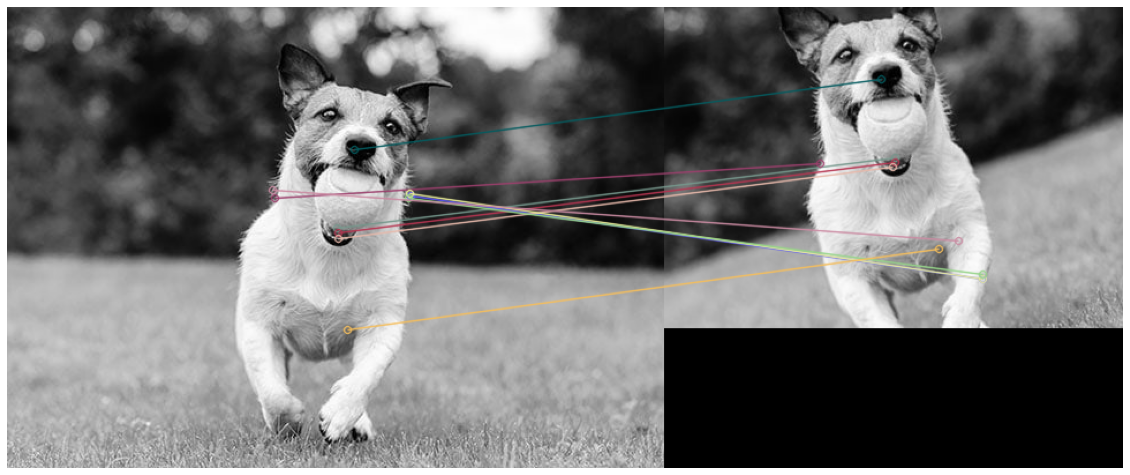

In [20]:
kp1, kp2, des1, des2 = fast_plus_brief(img1, img2)
bf_match(img1, img2, kp1, kp2, des1, des2)

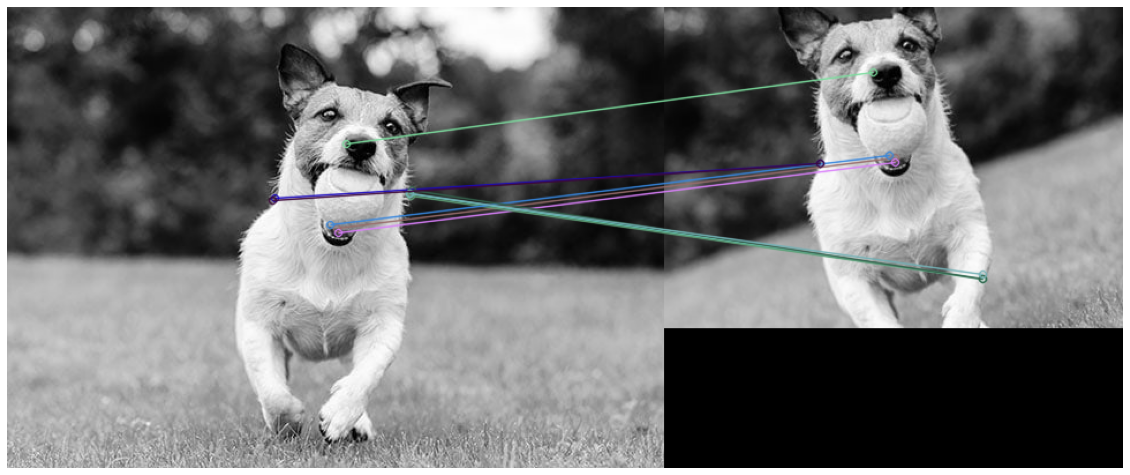

In [21]:
custom_matcher(img1, img2, kp1, kp2, des1, des2)